# Лабараторная №1. Основый предобработки данных 

Используйте файл своей группы. <br>
Загрузите его в DataFrame и ответьте на вопросы, используя инстурменты из файла preprocessing.ipynb.


#### Вопросы
1. В какой шкале представлены все признаки в наборе?<br>
2. Укажите признак с наименьшей дисперсией.<br>
3. Среднее какого признака отличается для двух классов сильнее всего?<br>
4. В каком классе больше всего skilled работников?<br>
5. Есть ли в наборе признаки с выбросами? Какие?<br>
6. Сколько пропущенных значений в наборе?<br>
7. Попытайтесь заполнить пропущенные значения.<br>
8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.<br>
9. Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?<br>
10. Какой признак(и) имеет смысл стандартизировать? Почему?<br>
11. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.<br>

In [22]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()

In [23]:
path='credit_3530203_70102.csv'
credit_df = pd.read_csv(path, index_col=0)

In [24]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 500
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   checking_status     501 non-null    object 
 1   duration            501 non-null    float64
 2   credit_history      501 non-null    object 
 3   credit_amount       501 non-null    float64
 4   employment          501 non-null    object 
 5   personal_status     501 non-null    object 
 6   other_parties       501 non-null    object 
 7   residence_since     501 non-null    float64
 8   property_magnitude  501 non-null    object 
 9   age                 501 non-null    float64
 10  housing             501 non-null    object 
 11  existing_credits    501 non-null    float64
 12  job                 501 non-null    object 
 13  num_dependents      501 non-null    float64
 14  own_telephone       501 non-null    object 
 15  foreign_worker      501 non-null    object 
 16  class   

In [80]:
credit_df.shape

(501, 17)

### <br>1. В какой шкале представлены все признаки в наборе?

In [58]:
credit_df.head(10)

,checking_status,duration,credit_history,credit_amount,employment,personal_status,other_parties,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,1169.0,>=7,male single,none,4.0,real estate,67.0,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,5951.0,1<=X<4,female div/dep/mar,none,2.0,real estate,22.0,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,2096.0,4<=X<7,male single,none,3.0,real estate,49.0,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,7882.0,4<=X<7,male single,guarantor,4.0,life insurance,45.0,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,4870.0,1<=X<4,male single,none,4.0,no known property,53.0,for free,2.0,skilled,2.0,none,yes,bad
5,no checking,36.0,existing paid,9055.0,1<=X<4,male single,none,4.0,no known property,35.0,for free,1.0,unskilled resident,2.0,yes,yes,good
6,no checking,24.0,existing paid,2835.0,>=7,male single,none,4.0,life insurance,53.0,own,1.0,skilled,1.0,none,yes,good
7,0<=X<200,36.0,existing paid,6948.0,1<=X<4,male single,none,2.0,car,35.0,rent,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
8,no checking,12.0,existing paid,3059.0,4<=X<7,male div/sep,none,4.0,real estate,61.0,own,1.0,unskilled resident,1.0,none,yes,good
9,0<=X<200,30.0,critical/other existing credit,5234.0,unemployed,male mar/wid,none,2.0,car,28.0,own,2.0,high qualif/self emp/mgmt,1.0,none,yes,bad


#####    НОМИНАЛЬНАЯ 
credit_history <BR>
personal_status<BR>
other_parties<BR>
housing<BR>
property_magnitude<BR>
own_telephone<BR>
foreign_worker<BR>
class<BR>
checking_status<BR><BR>

#####     ПОРЯДКОВАЯ 
employment<BR>
job<BR><BR>
    
#####     АБСОЛЮТНАЯ
duration<BR>
credit_amount<BR>
num_dependents<BR>
residence_since	age<BR>
existing_credits<BR>

Attribute Information:

Attribute 1: (qualitative)
Status of existing checking account
A11 : ... < 0 DM
A12 : 0 <= ... < 200 DM
A13 : ... >= 200 DM / salary assignments for at least 1 year
A14 : no checking account

Attribute 2: (numerical)
Duration in month

Attribute 3: (qualitative)
Credit history
A30 : no credits taken/ all credits paid back duly
A31 : all credits at this bank paid back duly
A32 : existing credits paid back duly till now
A33 : delay in paying off in the past
A34 : critical account/ other credits existing (not at this bank)

<u>Attribute 4</u>: (qualitative)
Purpose
A40 : car (new)
A41 : car (used)
A42 : furniture/equipment
A43 : radio/television
A44 : domestic appliances
A45 : repairs
A46 : education
A47 : (vacation - does not exist?)
A48 : retraining
A49 : business
A410 : others

Attribute 5: (numerical)
Credit amount

Attibute 6: (qualitative)
Savings account/bonds
A61 : ... < 100 DM
A62 : 100 <= ... < 500 DM
A63 : 500 <= ... < 1000 DM
A64 : .. >= 1000 DM
A65 : unknown/ no savings account

Attribute 7: (qualitative)
Present employment since
A71 : unemployed
A72 : ... < 1 year
A73 : 1 <= ... < 4 years
A74 : 4 <= ... < 7 years
A75 : .. >= 7 years

Attribute 8: (numerical)
Installment rate in percentage of disposable income

Attribute 9: (qualitative)
Personal status and sex
A91 : male : divorced/separated
A92 : female : divorced/separated/married
A93 : male : single
A94 : male : married/widowed
A95 : female : single

Attribute 10: (qualitative)
Other debtors / guarantors
A101 : none
A102 : co-applicant
A103 : guarantor

Attribute 11: (numerical)
Present residence since

Attribute 12: (qualitative)
Property
A121 : real estate
A122 : if not A121 : building society savings agreement/ life insurance
A123 : if not A121/A122 : car or other, not in attribute 6
A124 : unknown / no property

Attribute 13: (numerical)
Age in years

Attribute 14: (qualitative)
Other installment plans
A141 : bank
A142 : stores
A143 : none

Attribute 15: (qualitative)
Housing
A151 : rent
A152 : own
A153 : for free

Attribute 16: (numerical)
Number of existing credits at this bank

Attribute 17: (qualitative)
Job
A171 : unemployed/ unskilled - non-resident
A172 : unskilled - resident
A173 : skilled employee / official
A174 : management/ self-employed/
highly qualified employee/ officer

Attribute 18: (numerical)
Number of people being liable to provide maintenance for

Attribute 19: (qualitative)
Telephone
A191 : none
A192 : yes, registered under the customers name

Attribute 20: (qualitative)
foreign worker
A201 : yes
A202 : no

In [27]:
credit_df.describe()

,duration,credit_amount,residence_since,age,existing_credits,num_dependents
count,501.000,501.00,501.000,501.000,501.000,501.000
mean,20.315,3192.22,2.782,35.511,1.393,1.144
std,12.103,2839.16,1.162,11.466,0.568,0.351
min,4.000,-999.00,-1.000,19.000,1.000,1.000
25%,12.000,1318.00,2.000,27.000,1.000,1.000
50%,18.000,2241.00,3.000,33.000,1.000,1.000
75%,24.000,3915.00,4.000,41.000,2.000,1.000
max,60.000,15945.00,4.000,75.000,4.000,2.000


### 2. Признак с наименьшей дисперсией - num_dependents

In [14]:
credit_df.var()

duration            1.465e+02
credit_amount       8.061e+06
residence_since     1.351e+00
age                 1.315e+02
existing_credits    3.231e-01
num_dependents      1.233e-01
dtype: float64

### 3. Среднее какого признака отличается для двух классов сильнее всего?

#### &emsp; Среднее по каждому признаку для всего набора

In [21]:
credit_df.mean()

duration              20.315
credit_amount       3192.220
residence_since        2.782
age                   35.511
existing_credits       1.393
num_dependents         1.144
dtype: float64

#### &emsp; Среднее по каждому признаку отдельно для класса good и для класса bad 

In [35]:
credit_df.groupby(['class']).mean()

,duration,credit_amount,residence_since,age,existing_credits,num_dependents
class,,,,,,
bad,25.255,4104.292,2.730,34.686,1.380,1.153
good,18.456,2848.940,2.802,35.821,1.398,1.140


#### &emsp; Сильнее всего отличается credit_amount - 4104.3 для BAD и 2848.9 для GOOD  <br> 

### <br>4. В каком классе больше всего skilled работников?

In [112]:
credit_df.groupby(['class','job']).count()

checking_status  duration  credit_history  \
class job                                                                    
bad   high qualif/self emp/mgmt               33        33              33   
      skilled                                 80        80              80   
      unemp/unskilled non res                  4         4               4   
      unskilled resident                      20        20              20   
good  high qualif/self emp/mgmt               49        49              49   
      skilled                                232       232             232   
      unemp/unskilled non res                  7         7               7   
      unskilled resident                      76        76              76   

                                 credit_amount  employment  personal_status  \
class job                                                                     
bad   high qualif/self emp/mgmt             33          33               33   
      skilled                               80          80               80   
      unemp/unskilled non res                4           4                4   
      unskilled resident                    20          20               20   
good  high qualif/self emp/mgmt             49          49               49   
      skilled                              232         232              232   
      unemp/unskilled non res                7           7                7   
      unskilled resident                    76          76               76   

                                 other_parties  residence_since  \
class job                                                         
bad   high qualif/self emp/mgmt             33               33   
      skilled                               80               80   
      unemp/unskilled non res                4                4   
      unskilled resident                    20               20   
good  high qualif/self emp/mgmt             49               49   
      skilled                              232              232   
      unemp/unskilled non res                7                7   
      unskilled resident                    76               76   

                                 property_magnitude  age  housing  \
class job                                                           
bad   high qualif/self emp/mgmt                  33   33       33   
      skilled                                    80   80       80   
      unemp/unskilled non res                     4    4        4   
      unskilled resident                         20   20       20   
good  high qualif/self emp/mgmt                  49   49       49   
      skilled                                   232  232      232   
      unemp/unskilled non res                     7    7        7   
      unskilled resident                         76   76       76   

                                 existing_credits  num_dependents  \
class job                                                           
bad   high qualif/self emp/mgmt                33              33   
      skilled                                  80              80   
      unemp/unskilled non res                   4               4   
      unskilled resident                       20              20   
good  high qualif/self emp/mgmt                49              49   
      skilled                                 232             232   
      unemp/unskilled non res                   7               7   
      unskilled resident                       76              76   

                                 own_telephone  foreign_worker  
class job                                                       
bad   high qualif/self emp/mgmt             33              33  
      skilled                               80              80  
      unemp/unskilled non res                4               4  
      unskilled resident                    20              20  
good  high qualif/

In [113]:
credit_df[['class','job']].where(credit_df['job']=='skilled').groupby(['class']).count()

,job
class,
bad,80
good,232


#### &emsp; Skilled работников больше всего в классе GOOD - 232 человека, в классе BAD - 80

### <br>5. Есть ли в наборе признаки с выбросами? Какие?<br>

#### &emsp; Выбросы есть у признака credit_amount

<AxesSubplot:xlabel='age'>

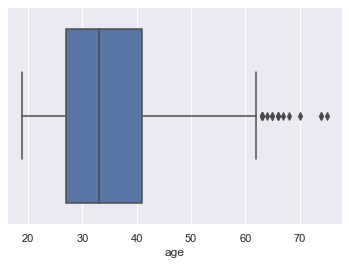

In [115]:
sns.boxplot(x='age', data=credit_df)

<AxesSubplot:xlabel='credit_amount'>

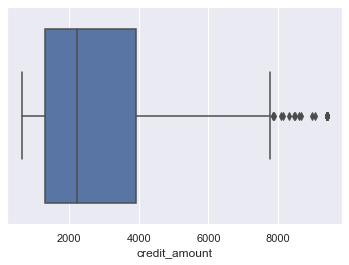

In [116]:
sns.boxplot(x='credit_amount', data=credit_df)

<AxesSubplot:>

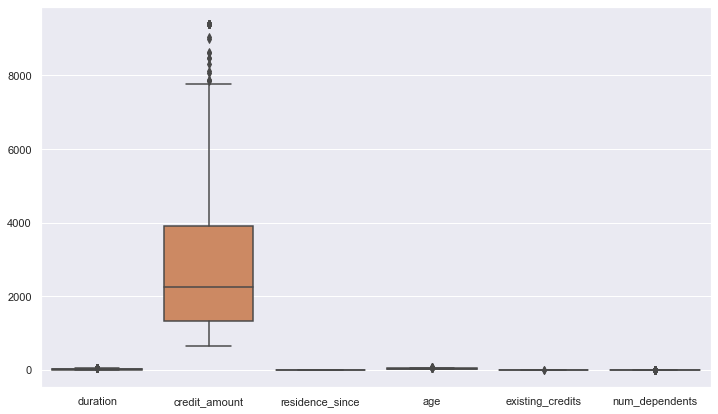

In [117]:
plt.subplots(figsize=(12,7))
sns.boxplot(data=credit_df)

credit_df['credit_amount'] = credit_df.credit_amount.clip(lower=credit_df.credit_amount.quantile(0.05), 
                                                  upper=credit_df.credit_amount.quantile(0.95))

<AxesSubplot:>

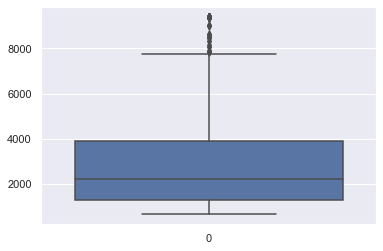

In [147]:
sns.boxplot(data=credit_df.credit_amount.clip(lower=credit_df.credit_amount.quantile(0.05), 
                                                  upper=credit_df.credit_amount.quantile(0.95)))
# проверить использование clip без изменения исходных данных!

<AxesSubplot:>

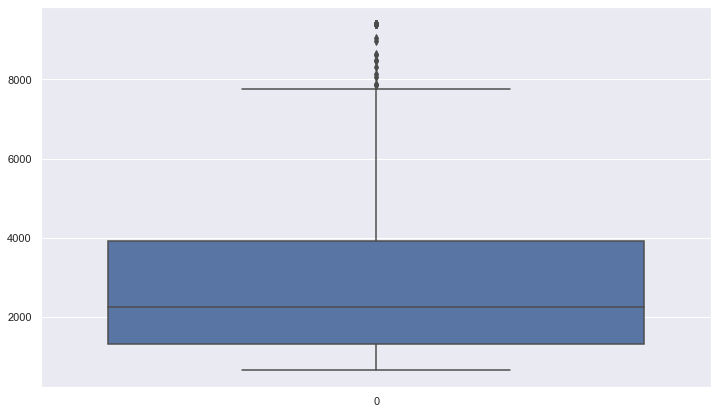

In [118]:
plt.subplots(figsize=(12,7))
sns.boxplot(data=credit_df['credit_amount'])

### <br>6. Сколько пропущенных значений в наборе?

#### ????

#### &emsp; Поиск пропусков

In [119]:
credit_df.describe()

,duration,credit_amount,residence_since,age,existing_credits,num_dependents
count,501.000,501.000,501.000,501.000,501.000,501.000
mean,20.315,3091.872,2.802,35.511,1.393,1.144
std,12.103,2408.318,1.113,11.466,0.568,0.351
min,4.000,660.000,1.000,19.000,1.000,1.000
25%,12.000,1318.000,2.000,27.000,1.000,1.000
50%,18.000,2241.000,3.000,33.000,1.000,1.000
75%,24.000,3915.000,4.000,41.000,2.000,1.000
max,60.000,9398.000,4.000,75.000,4.000,2.000


#### &emsp; residence_since < 0 не может быть

In [120]:
credit_df[credit_df.residence_since<1] 

,checking_status,duration,credit_history,credit_amount,employment,personal_status,other_parties,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class


In [121]:
no_zero_columns = list (set(credit_df.columns) -  set(['existing_credits','num_dependents','credit_amount']))

In [122]:
(credit_df[no_zero_columns] == 0).sum()

own_telephone         0
housing               0
personal_status       0
duration              0
credit_history        0
foreign_worker        0
property_magnitude    0
other_parties         0
job                   0
residence_since       0
age                   0
checking_status       0
employment            0
class                 0
dtype: int64

In [123]:
credit_df.loc[:, no_zero_columns] = credit_df[no_zero_columns].replace(0, np.NaN)
credit_df.head(10)

,checking_status,duration,credit_history,credit_amount,employment,personal_status,other_parties,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,1169.0,>=7,male single,none,4.0,real estate,67.0,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,5951.0,1<=X<4,female div/dep/mar,none,2.0,real estate,22.0,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,2096.0,4<=X<7,male single,none,3.0,real estate,49.0,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,7882.0,4<=X<7,male single,guarantor,4.0,life insurance,45.0,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,4870.0,1<=X<4,male single,none,4.0,no known property,53.0,for free,2.0,skilled,2.0,none,yes,bad
5,no checking,36.0,existing paid,9055.0,1<=X<4,male single,none,4.0,no known property,35.0,for free,1.0,unskilled resident,2.0,yes,yes,good
6,no checking,24.0,existing paid,2835.0,>=7,male single,none,4.0,life insurance,53.0,own,1.0,skilled,1.0,none,yes,good
7,0<=X<200,36.0,existing paid,6948.0,1<=X<4,male single,none,2.0,car,35.0,rent,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
8,no checking,12.0,existing paid,3059.0,4<=X<7,male div/sep,none,4.0,real estate,61.0,own,1.0,unskilled resident,1.0,none,yes,good
9,0<=X<200,30.0,critical/other existing credit,5234.0,unemployed,male mar/wid,none,2.0,car,28.0,own,2.0,high qualif/self emp/mgmt,1.0,none,yes,bad


In [124]:
credit_df.isnull().sum()

checking_status       0
duration              0
credit_history        0
credit_amount         0
employment            0
personal_status       0
other_parties         0
residence_since       0
property_magnitude    0
age                   0
housing               0
existing_credits      0
job                   0
num_dependents        0
own_telephone         0
foreign_worker        0
class                 0
dtype: int64

### <br>7. Попытайтесь заполнить пропущенные значения.<br>

In [127]:
credit_df.isnull().mean()

checking_status       0.0
duration              0.0
credit_history        0.0
credit_amount         0.0
employment            0.0
personal_status       0.0
other_parties         0.0
residence_since       0.0
property_magnitude    0.0
age                   0.0
housing               0.0
existing_credits      0.0
job                   0.0
num_dependents        0.0
own_telephone         0.0
foreign_worker        0.0
class                 0.0
dtype: float64

In [110]:
credit_df.residence_since = credit_df['residence_since'].replace(-1,1)

# diabetes_df['Glucose'].fillna((diabetes['Glucose']).mode()[0], inplace=True)
# diabetes_df['BMI'].fillna((diabetes['BMI']).mean(), inplace=True)
# diabetes_df['Insulin'].fillna((diabetes['Insulin']).median(), inplace=True)

credit_df[credit_df.residence_since<1] 

,checking_status,duration,credit_history,credit_amount,employment,personal_status,other_parties,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class


#### &emsp; Все значения residence_since равные -1 заменяем на 1 

### <br>8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.<br>

In [ ]:
# credit_df['age'].value_counts()

In [134]:
credit_df['class'].value_counts()

good    364
bad     137
Name: class, dtype: int64

In [142]:
credit_df['credit_history'].value_counts()

existing paid                     269
critical/other existing credit    149
delayed previously                 46
no credits/all paid                21
all paid                           16
Name: credit_history, dtype: int64

In [145]:
credit_df['duration'].mean()

20.315369261477045

In [144]:
credit_df['job'].value_counts()

skilled                      312
unskilled resident            96
high qualif/self emp/mgmt     82
unemp/unskilled non res       11
Name: job, dtype: int64

In [137]:
# 3 варианта построения диаграмм

<AxesSubplot:>

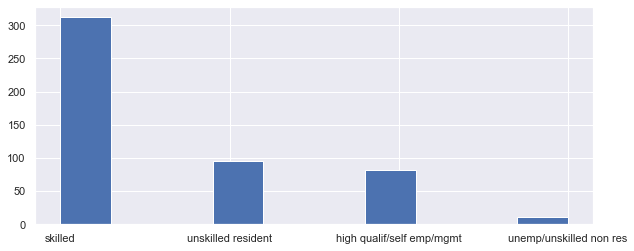

In [133]:
credit_df['job'].hist(figsize=(10, 4))

<AxesSubplot:>

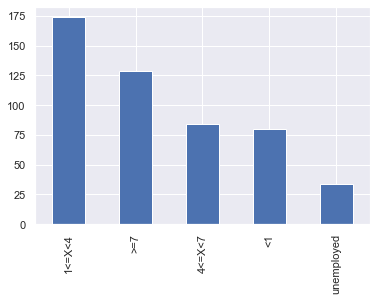

In [132]:
credit_df['employment'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='class', ylabel='count'>

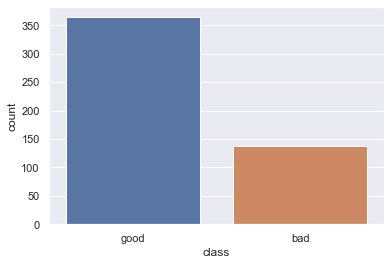

In [135]:
sns.countplot(x='class', data=credit_df)

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# sns.countplot(x='Age_expert', data=credit_df, ax=axes[0])
# sns.countplot(x='Age_equal', data=credit_df, ax=axes[1])

### <br>9. Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?<br>

In [ ]:
<br>

#### Только количественные признаки

Text(0, 0.5, 'Duration')

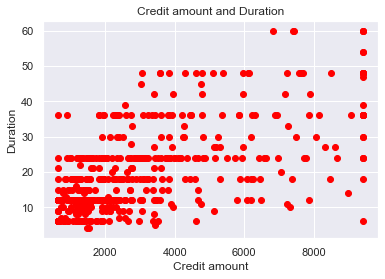

In [139]:
plt.scatter(credit_df['credit_amount'], credit_df['duration'], color='red')
plt.title('Credit amount and Duration')
plt.xlabel('Credit amount')
plt.ylabel('Duration')

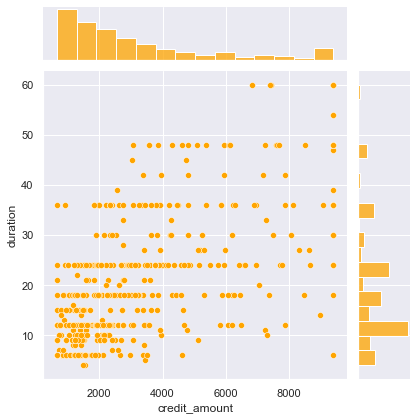

In [140]:
sns.jointplot(x='credit_amount', y='duration', data=credit_df, kind='scatter', color='orange')


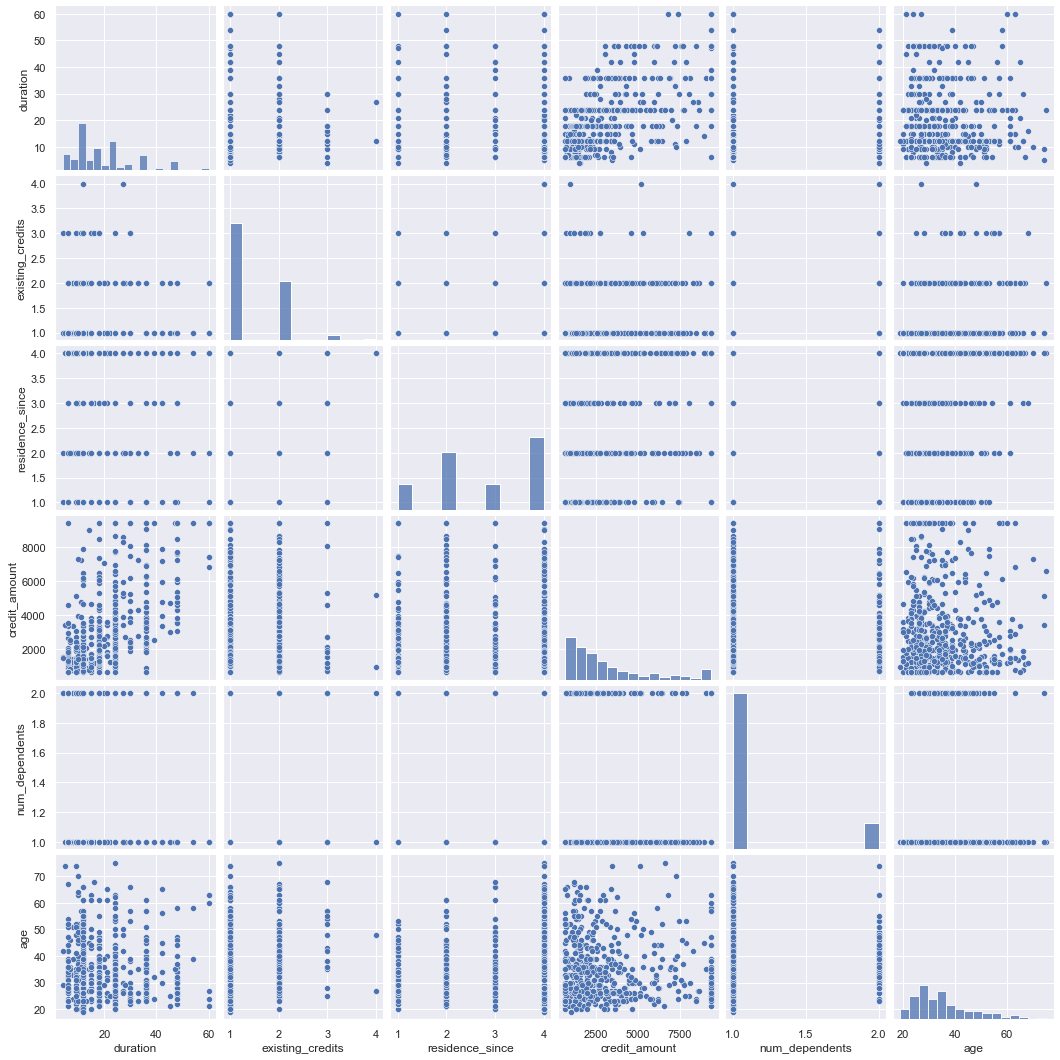

In [154]:
num_columns =  list(set(credit_df.columns) -  set(['class','own_telephone']))
sns.pairplot(credit_df[num_columns])

In [156]:
corr_matrix = credit_df[num_columns].corr()
corr_matrix

,duration,existing_credits,residence_since,credit_amount,num_dependents,age
duration,1.000,-0.031,0.055,0.624,-0.014,-0.032
existing_credits,-0.031,1.000,0.069,0.037,0.107,0.147
residence_since,0.055,0.069,1.000,0.035,0.083,0.325
credit_amount,0.624,0.037,0.035,1.000,0.035,0.003
num_dependents,-0.014,0.107,0.083,0.035,1.000,0.112
age,-0.032,0.147,0.325,0.003,0.112,1.000


<AxesSubplot:>

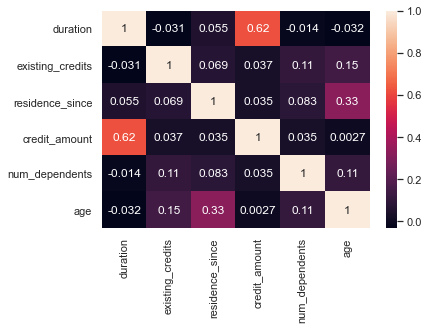

In [157]:
sns.heatmap(corr_matrix, annot=True, annot_kws={"size":12})

#### Количественные и качественные признаки

In [138]:
credit_df.pivot_table(['credit_amount', 'age'],['class'], aggfunc='mean')

,age,credit_amount
class,,
bad,34.686,3796.693
good,35.821,2826.596


<AxesSubplot:xlabel='personal_status', ylabel='num_dependents'>

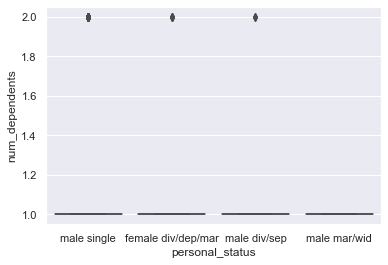

In [71]:
sns.boxplot(x='personal_status', y='num_dependents', data=credit_df)

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


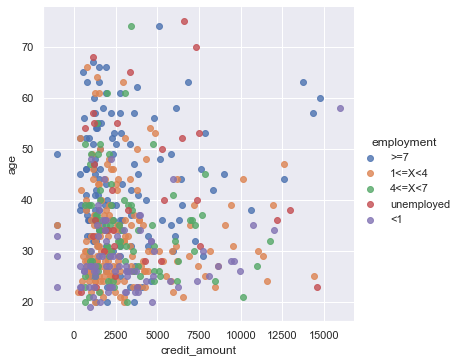

In [73]:
sns.lmplot('credit_amount', 'age', data=credit_df, hue='employment', fit_reg=False);

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


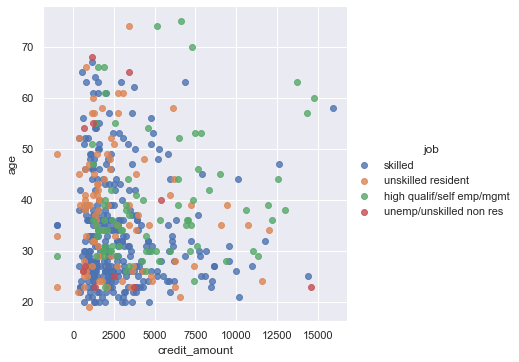

In [75]:
sns.lmplot('credit_amount', 'age', data=credit_df, hue='job', fit_reg=False);

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


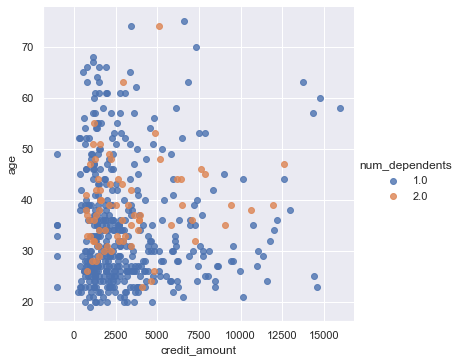

In [70]:
sns.lmplot('credit_amount', 'age', data=credit_df, hue='num_dependents', fit_reg=False);

#### Только качественные признаки

In [57]:
pd.crosstab(credit_df['job'], credit_df['credit_history'], margins=True)

credit_history,all paid,critical/other existing credit,delayed previously,existing paid,no credits/all paid,All
job,,,,,,
high qualif/self emp/mgmt,5,26,11,38,2,82
skilled,5,90,26,175,16,312
unemp/unskilled non res,1,3,0,7,0,11
unskilled resident,5,30,9,49,3,96
All,16,149,46,269,21,501


<AxesSubplot:xlabel='job', ylabel='count'>

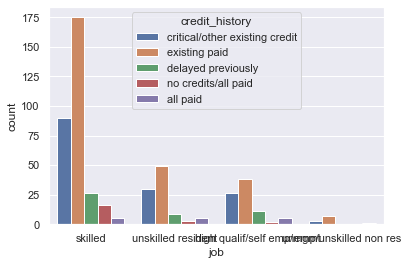

In [77]:
sns.countplot(x='job', hue='credit_history', data=credit_df)

<AxesSubplot:xlabel='housing', ylabel='count'>

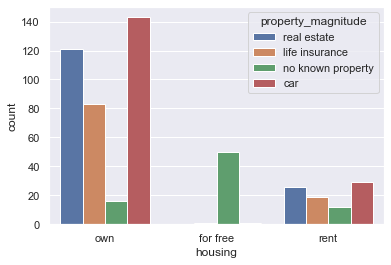

In [78]:
sns.countplot(x='housing', hue='property_magnitude', data=credit_df)

In [60]:
pd.crosstab(credit_df['personal_status'], credit_df['property_magnitude'], margins=True)

property_magnitude,car,life insurance,no known property,real estate,All
personal_status,,,,,
female div/dep/mar,56,35,19,43,153
male div/sep,11,3,3,8,25
male mar/wid,14,8,1,25,48
male single,92,57,55,71,275
All,173,103,78,147,501


### <br>10. Какой признак(и) имеет смысл стандартизировать? Почему?<br>

#### &emsp; Cтандартизировать нужно credit_amount

##### Потому что credit_amount измеряется в 1000, а другие признаки в 1 и 10, после стандартизации будет удобнее проводить сравненение credit_amount с другими признаками

<AxesSubplot:ylabel='Density'>

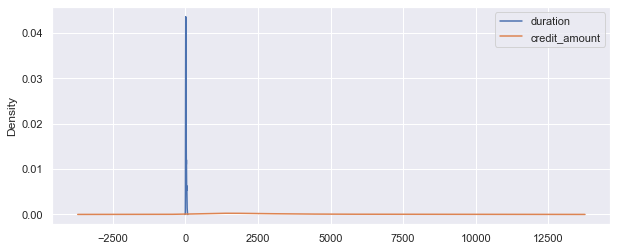

In [159]:
credit_df[['duration','credit_amount']].plot(kind='density', layout=(1, 2), sharex=False, figsize=(10, 4))

<AxesSubplot:>

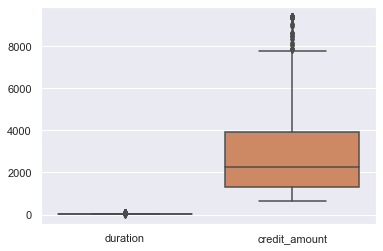

In [160]:
sns.boxplot(data=credit_df[['duration', 'credit_amount']])

In [161]:
std_scaler = StandardScaler().fit(credit_df[['duration','credit_amount']]) #считает среднее и стандартное отклонение

cols_std_scaled = std_scaler.transform(credit_df[['duration','credit_amount']]) #считает среднее и стандартное отклонение для каждого признака

minmax_scaler = MinMaxScaler().fit(credit_df[['duration','credit_amount']])

cols_minmax_scaled = minmax_scaler.transform(credit_df[['duration','credit_amount']])

type(cols_std_scaled)

numpy.ndarray

In [162]:
print('Mean after standardization:\nduration={:.2f}, credit_amount={:.2f}'
      .format(cols_std_scaled[:,0].mean(), cols_std_scaled[:,1].mean()))
print('\nStandard deviation after standardization:\nage={:.2f}, credit_amount={:.2f}\n'
      .format(cols_std_scaled[:,0].std(), cols_std_scaled[:,1].std()))

print('Mean after min-max scaling:\nduration={:.2f}, credit_amount={:.2f}'
      .format(cols_minmax_scaled[:,0].mean(), cols_minmax_scaled[:,1].mean()))
print('\nStandard deviation after min-max scaling:\nduration={:.2f}, credit_amount={:.2f}'
      .format(cols_minmax_scaled[:,0].std(), cols_minmax_scaled[:,1].std()))

Mean after standardization:
duration=0.00, credit_amount=0.00

Standard deviation after standardization:
age=1.00, credit_amount=1.00

Mean after min-max scaling:
duration=0.29, credit_amount=0.28

Standard deviation after min-max scaling:
duration=0.22, credit_amount=0.28


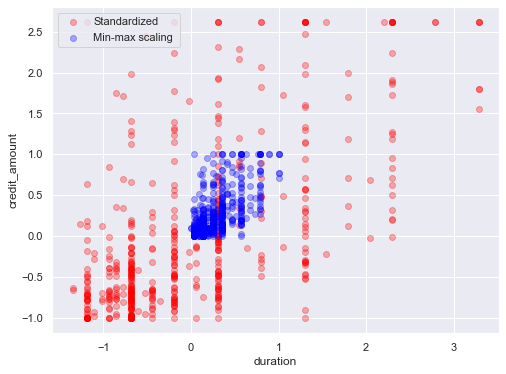

In [163]:
plt.figure(figsize=(8,6))
#plt.scatter(diabetes_df['DiabetesPedigreeFunction'], diabetes_df['Insulin'], color='orange', label='input scale', alpha=0.5)  
plt.scatter(cols_std_scaled[:,0], cols_std_scaled[:,1], color='red', label='Standardized', alpha=0.3)
plt.scatter(cols_minmax_scaled[:,0], cols_minmax_scaled[:,1],color='blue', label='Min-max scaling ', alpha=0.3)
plt.xlabel('duration')
plt.ylabel('credit_amount')
plt.legend(loc='upper left')


<AxesSubplot:ylabel='Density'>

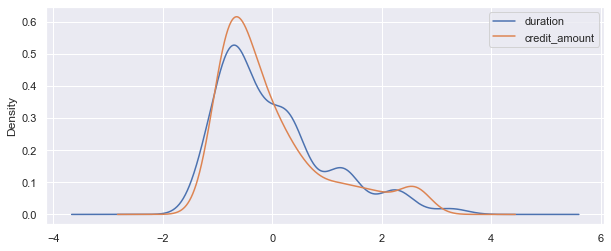

In [164]:
credit_df_scaled = pd.DataFrame(cols_std_scaled, columns = ['duration', 'credit_amount'])

credit_df_scaled[['duration','credit_amount']].plot(kind='density', layout=(1, 2), sharex=False, figsize=(10, 4))

<AxesSubplot:>

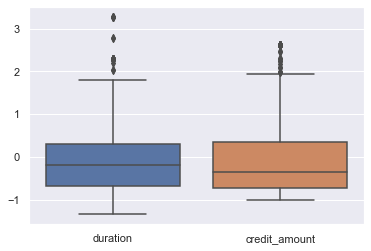

In [165]:
sns.boxplot(data=credit_df_scaled[['duration', 'credit_amount']])

### <br>11. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.<br>

"Доход" - ежемесячный доход заемщика
Почему? необходим для оценки платежеспособности клиента

"Цель кредита" - на что был взят кредит - ипотека, кредит на машину, на учебу, на лечение
Почему? можно оценить уровень достатка, если у человека уже есть дом и он берет кредит на машину, 
то, скорее всего, он сможет закрыть этот кредит без проблем.
Кредит на лечение наоборот может означать, что, либо сам человек, либо кто-то из его родственников, 
станет (на время или даже навсегда, а кредит обычно берут, когда требуются боьшие суммы, т.е. лечение тяжелых заболеваний) 
недееспособным => у негг появятся лишние расходы, ему будет труднее платить по кредиту.



### <span style="color:gray">Testing functions</span>

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

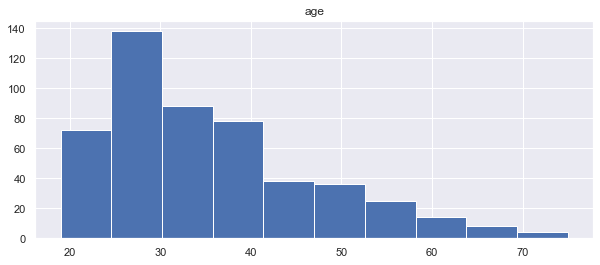

In [18]:
credit_df[['age','class']].hist(figsize=(10, 4))

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'credit_amount'}>]], dtype=object)

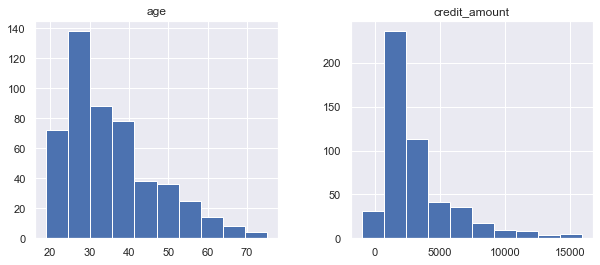

In [8]:
credit_df[['age','credit_amount']].hist(figsize=(10, 4))

Histograms vs. Kernel Density Estimation <br>
https://mglerner.github.io/posts/histograms-and-kernel-density-estimation-kde-2.html?p=28 

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

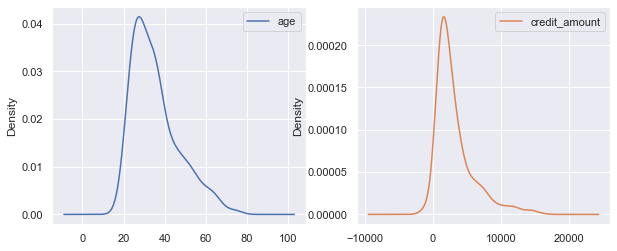

In [9]:
credit_df[['age','credit_amount']].plot(kind='density', layout=(1, 2), subplots=True,
                                    figsize=(10, 4), sharex=False)

c:\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

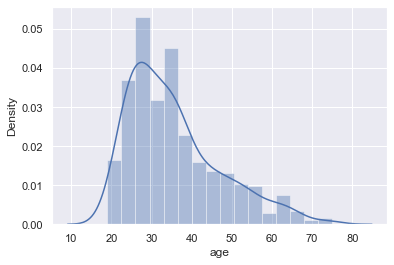

In [10]:
sns.distplot(credit_df['age'])